In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', '{:.2f}'.format)

# Import Data

In [ ]:
#Diretorio onde os dados estão salvos no Google Drive
dir = "/content/drive/MyDrive/10_Trabalho/2_Cases_testes/202506_Ifood/ifood-case/data/raw"

## Transactions Dataset

In [ ]:
# Leitura da base de dados de transações
transactions = pd.read_json(dir + '/transactions.json')
print(transactions.shape)

(306534, 4)


In [ ]:
# A coluna value é um json, e precisa ser distribuida em colunas
info_expandido = transactions['value'].apply(pd.Series)
transactions = pd.concat([transactions.drop(columns='value'), info_expandido], axis=1)
transactions.columns = ['event', 'account_id', 'time_since_test_start', 'amount', 'offer_id','offer_id_info', 'reward']
transactions.head(1)

,event,account_id,time_since_test_start,amount,offer_id,offer_id_info,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,NaN


In [ ]:
# Cria a coluna com o valor do id da oferta, pois tem duas colunas com a mesma informação
transactions['offer_id_pk'] = transactions['offer_id'].fillna(transactions['offer_id_info'])
print(transactions.shape)

(306534, 8)


## Profile Dataset

In [ ]:
# Leitura da base de dados do perfil dos clientes
profile = pd.read_json(dir + '/profile.json')
profile.columns = ['age', 'registered_on','gender','profile_id', 'credit_card_limit']
profile.head(1)

,age,registered_on,gender,profile_id,credit_card_limit
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN


In [ ]:
profile.shape

(17000, 5)

## Offers Dataset

In [ ]:
# Leitura da base de dados de transações
offers = pd.read_json(dir + '/offers.json')

### Expandir lista de canais por oferta
canal_expandido = offers['channels'].apply(pd.Series)
offers = pd.concat([offers, canal_expandido], axis=1)
offers.columns = ['channels', 'min_value', 'duration', 'offer_id', 'offer_type','discount_value',
                  'channel_0','channel_1','channel_2','channel_3']
print(offers.shape)
offers.head(1)

(10, 10)


,channels,min_value,duration,offer_id,offer_type,discount_value,channel_0,channel_1,channel_2,channel_3
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,email,mobile,social,NaN


## Join Datasets

In [ ]:
df = transactions.merge(profile, how='left', left_on='account_id', right_on='profile_id')
print(df.shape)
df.head(1)

(306534, 13)


,event,account_id,time_since_test_start,amount,offer_id,offer_id_info,reward,offer_id_pk,age,registered_on,gender,profile_id,credit_card_limit
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00


In [ ]:
df = df.merge(offers, how='left', left_on='offer_id_pk', right_on='offer_id')
print(df.shape)
df.head(1)

(306534, 23)


,event,account_id,time_since_test_start,amount,offer_id_x,offer_id_info,reward,offer_id_pk,age,registered_on,...,channels,min_value,duration,offer_id_y,offer_type,discount_value,channel_0,channel_1,channel_2,channel_3
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,20170509,...,"[web, email, mobile]",5.00,7.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.00,web,email,mobile,NaN


In [ ]:
df.columns

Index(['event', 'account_id', 'time_since_test_start', 'amount', 'offer_id_x',
       'offer_id_info', 'reward', 'offer_id_pk', 'age', 'registered_on',
       'gender', 'profile_id', 'credit_card_limit', 'channels', 'min_value',
       'duration', 'offer_id_y', 'offer_type', 'discount_value', 'channel_0',
       'channel_1', 'channel_2', 'channel_3'],
      dtype='object')

In [ ]:
df = df[['account_id','profile_id','event', 'offer_id_pk','offer_id_info', 'time_since_test_start', 'amount',
        'reward',  'age', 'registered_on',
       'gender',  'credit_card_limit', 'min_value',
       'duration', 'offer_type', 'discount_value', 'channel_0',
       'channel_1', 'channel_2', 'channel_3']]

In [ ]:
# Verificar Duplicados
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(306534, 20)
(306137, 20)


In [ ]:
#Informações gerais da base de dados
print('Quantidade de exemplos (linhas) :',df.shape[0])
print('Quantidade de caracteristicas (colunas) :',df.shape[1])
print('Quantidade de linhas duplicadas:',df[df.duplicated()].shape[0])

Quantidade de exemplos (linhas) : 306137
Quantidade de caracteristicas (colunas) : 20
Quantidade de linhas duplicadas: 0


In [ ]:
df.head(1)

,account_id,profile_id,event,offer_id_pk,offer_id_info,time_since_test_start,amount,reward,age,registered_on,gender,credit_card_limit,min_value,duration,offer_type,discount_value,channel_0,channel_1,channel_2,channel_3
0,78afa995795e4d85b5d9ceeca43f5fef,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,0.00,NaN,NaN,75,20170509,F,100000.00,5.00,7.00,bogo,5.00,web,email,mobile,NaN


# Construindo Target

*   target = 1 , se cliente aderiu a oferta
*   target = 0 , se cliente não aderiu a oferta



In [ ]:
df['event'].value_counts()

,count
event,
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33182


<Axes: xlabel='target'>

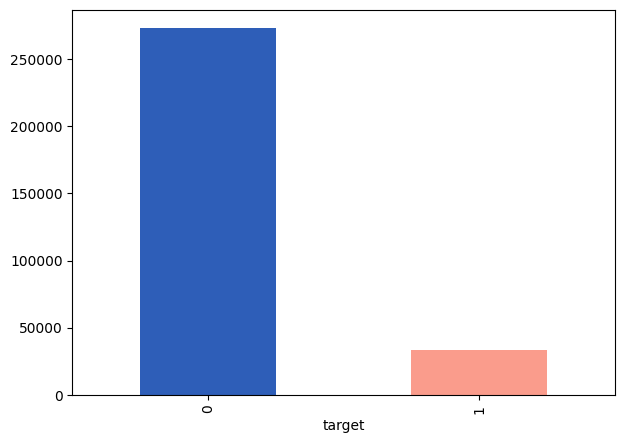

In [ ]:
df['target'] = (df['event'] == 'offer completed').astype(int)
df['target'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c'])

# Analise Exploratoria de Dados

## Criando novas variaveis

In [ ]:
conditions_idade = [
    (df['age'] <= 25),
    (df['age'] > 25) & (df['age'] <= 35),
    (df['age'] > 35) & (df['age'] <= 45),
    (df['age'] > 45) & (df['age'] <= 55),
    (df['age'] > 55) & (df['age'] <= 65),
    (df['age'] > 65) & (df['age'] <= 90),
    (df['age'] > 90)
    ]
values_idade = ['Até 25', 'Entre 26 e 35', 'Entre 36 e 45', 'Entre 46 e 55', 'Entre 56 e 65','Entre 66 e 90', 'Acima de 90']
df['Fx_Idade'] = np.select(
    conditions_idade,
    values_idade,
    default='Não informado'  # ← tipo str, igual aos outros valores
)
df['Fx_Idade'] = pd.Categorical(df['Fx_Idade'], categories=values_idade, ordered=True)

In [ ]:
vl_age = df[['account_id','Fx_Idade']]
print(vl_age.shape)
vl_age = vl_age.drop_duplicates()
print(vl_age.shape)

(306137, 2)
(17000, 2)


In [ ]:
vl_age['Fx_Idade'].value_counts()

,count
Fx_Idade,
Entre 66 e 90,3767
Entre 56 e 65,3351
Entre 46 e 55,3132
Acima de 90,2394
Entre 36 e 45,1982
Entre 26 e 35,1362
Até 25,1012


### Tempo de conta ativa do cliente

*   Tempo de conta de quem aderiu a oferta (laranja)
*   Tempo de conta de todos os clientes (azul)



In [ ]:
# Criando variavel do tempo que o cliente tem conta ativa
df['registered_date'] = pd.to_datetime(df['registered_on'], format='%Y%m%d')
hoje = pd.to_datetime('2025-06-27')  # ou data da última transação

df['account_age'] = ((hoje - df['registered_date']).dt.days / 365).round(2)

In [ ]:
df_target = df[df['target'] == 1]
df_no_target = df[df['target'] == 0]

In [ ]:
conditions_age = [
    (df['account_age'] <= 1),
    (df['account_age'] > 1) & (df['account_age'] <= 5),
    (df['account_age'] > 5) & (df['account_age'] <= 8),
    (df['account_age'] > 8) & (df['account_age'] <= 10),
    (df['account_age'] > 10)
    ]
values_age = ['Até 1', 'Entre 1 e 5', 'Entre 6 e 8', 'Entre 9 e 10',  'Acima de 10']
df['Fx_Tempo_Conta'] = np.select(
    conditions_age,
    values_age,
    default='Não informado'  # ← tipo str, igual aos outros valores
)
df['Fx_Tempo_Conta'] = pd.Categorical(df['Fx_Tempo_Conta'], categories=values_age, ordered=True)

In [ ]:
vl_conta_age = df[['account_id','Fx_Tempo_Conta']]
print(vl_conta_age.shape)
vl_conta_age = vl_conta_age.drop_duplicates()
print(vl_conta_age.shape)

(306137, 2)
(17000, 2)


In [ ]:
vl_conta_age['Fx_Tempo_Conta'].value_counts()

,count
Fx_Tempo_Conta,
Entre 6 e 8,8966
Entre 9 e 10,6692
Acima de 10,1342
Até 1,0
Entre 1 e 5,0


<Axes: >

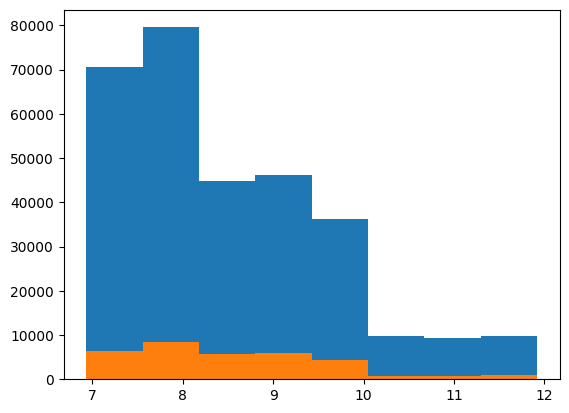

In [ ]:
plt.subplot(1, 1, 1)
df['account_age'].hist(grid = False, bins = 8)

plt.subplot(1, 1, 1)
df_target['account_age'].hist(grid = False, bins = 8)

***O grafico acima mostra a diferença de tempo de conta de quem aderiu a campanha (laranja) e o tempo de conta de todos os cliente (azul).**



### Limite de Credito

In [ ]:
conditions_credito = [
    (df['credit_card_limit'] <= 5000),
    (df['credit_card_limit'] > 5000) & (df['credit_card_limit'] <= 15000),
    (df['credit_card_limit'] > 15000) & (df['credit_card_limit'] <= 40000),
    (df['credit_card_limit'] > 40000) & (df['credit_card_limit'] <= 80000),
    (df['credit_card_limit'] > 80000) & (df['credit_card_limit'] <= 100000),
    (df['credit_card_limit'] > 100000)
    ]
values_credito = ['Até 5000',  'Entre 5k e 15k','Entre 15k e 40k','Entre 40k e 80k','Entre 80k e 100k', 'Acima de 100k']
df['Fx_Limite'] = np.select(
    conditions_credito,
    values_credito,
    default='Não informado'  # ← tipo str, igual aos outros valores
)


In [ ]:
vl_credito = df[['account_id','Fx_Limite']]
print(vl_credito.shape)
vl_credito = vl_credito.drop_duplicates()
print(vl_credito.shape)

(306137, 2)
(17000, 2)


In [ ]:
# Faixas de Limite de Credito
vl_credito['Fx_Limite'].value_counts()

,count
Fx_Limite,
Entre 40k e 80k,9125
Entre 80k e 100k,2559
Não informado,2175
Entre 15k e 40k,2135
Acima de 100k,1006


<Axes: >

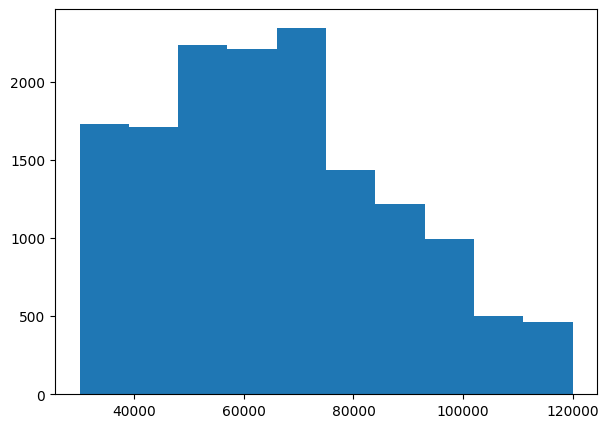

In [ ]:
  profile.credit_card_limit.hist(figsize=(7, 5), grid  = False)

### Indicadores de adesão as ofertas

In [ ]:
# Gerar contadores de transações por cliente e oferta
indicadores = df[['account_id', 'profile_id', 'offer_id_pk','event']]
indicadores['n_transaction'] = (indicadores['event'] == 'transaction').astype(int)
indicadores['n_offer_received'] = (indicadores['event'] == 'offer received').astype(int)
indicadores['n_offer_viewed'] = (indicadores['event'] == 'offer viewed').astype(int)
indicadores['n_offer_completed'] = (indicadores['event'] == 'offer completed').astype(int)

# Agrupar eventos por Cliente e Oferta
df_indicadores = indicadores.groupby(['account_id', 'offer_id_pk']).agg({
    'n_offer_received': 'sum',
    'n_offer_viewed': 'sum',
    'n_offer_completed': 'sum'
}).reset_index()

df_ind_interesse = df_indicadores[df_indicadores['n_offer_completed'] >0]

/tmp/ipython-input-31-3513913758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicadores['n_transaction'] = (indicadores['event'] == 'transaction').astype(int)
/tmp/ipython-input-31-3513913758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicadores['n_offer_received'] = (indicadores['event'] == 'offer received').astype(int)
/tmp/ipython-input-31-3513913758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

### Numero de ofertas recebidas por cada cliente

*   Numero de ofertas recebidas por cada cliente aderiu a oferta (laranja)
*   Numero de ofertas recebidas por cada cliente em todos os casos(azul)


<Axes: >

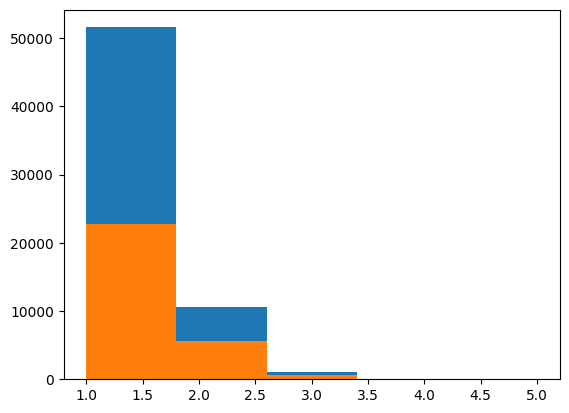

In [ ]:
plt.subplot(1, 1, 1)
df_indicadores['n_offer_received'].hist(grid = False, bins = 5)

plt.subplot(1, 1, 1)
df_ind_interesse['n_offer_received'].hist(grid = False, bins = 5)

### Numero de ofertas visualizadas por cada cliente

*   Numero de ofertas visualizadas por cada cliente aderiu a oferta (laranja)
*   Numero de ofertas visualizadas por cada cliente em todos os casos(azul)

<Axes: >

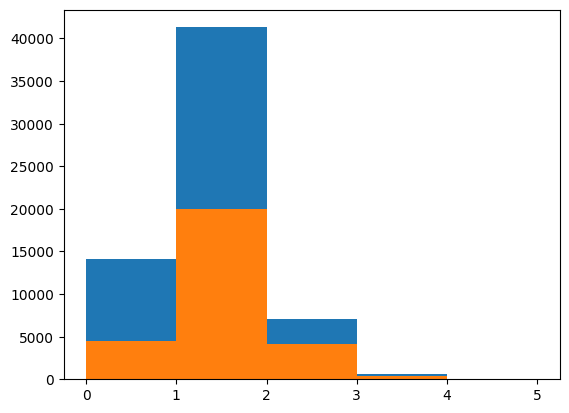

In [ ]:
plt.subplot(1, 1, 1)
df_indicadores['n_offer_viewed'].hist(grid = False, bins = 5)

plt.subplot(1, 1, 1)
df_ind_interesse['n_offer_viewed'].hist(grid = False, bins = 5)

### Taxa de Adesão e visualização
- Taxa de visualização (laranja)
- Taxa de Adesão(azul)

In [ ]:
# Criar variaveis de Taxas de adesao as ofertas.
# Taxa de visualização, cliente recebeu a oferta e visualizou
df_indicadores['tx_visualizacao'] = df_indicadores['n_offer_viewed'] / df_indicadores['n_offer_received']
# Taxa de Adesao, cliente que viu a oferta e aderiu
df_indicadores['tx_adesao'] = df_indicadores['n_offer_completed'] / df_indicadores['n_offer_viewed']

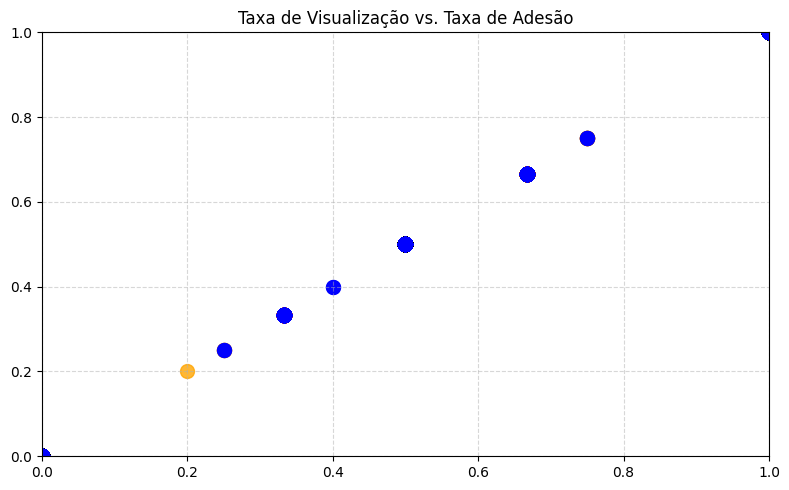

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df_indicadores['tx_visualizacao'], df_indicadores['tx_visualizacao'], s=100, alpha=0.8,color='orange' )
plt.scatter(df_indicadores['tx_adesao'], df_indicadores['tx_adesao'], s=100, alpha=0.9, color='blue' )

# Estética
plt.title('Taxa de Visualização vs. Taxa de Adesão')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Canal Principal por cliente

In [ ]:
# Filtrar visualizações de ofertas
df_viewed = df[df['event'] == 'offer viewed'][['account_id', 'offer_id_pk']]
# Explodir canais (um canal por linha)
df_canais = offers[['offer_id', 'channels']].explode('channels').rename(columns={'offer_id': 'offer_id', 'channels': 'canal'})
# Juntar visualizações com canais
df_view_canal = df_viewed.merge(df_canais, how='left', left_on='offer_id_pk', right_on='offer_id')
# Contar visualizações por canal por cliente
df_contagem = df_view_canal.groupby(['account_id', 'canal']).size().reset_index(name='n_views')
# Canal mais visualizado
df_canal_preferido = df_contagem.sort_values('n_views', ascending=False)\
                                .drop_duplicates('account_id')\
                                .rename(columns={'canal': 'canal_preferido'})[['account_id', 'canal_preferido']]



In [ ]:
df_agrupado = df_contagem.groupby('canal').agg(
    contas_unicas=('account_id', 'nunique'),
    total_views=('n_views', 'sum')
).reset_index()

### Qtd de Clientes que acessaram cada Canal

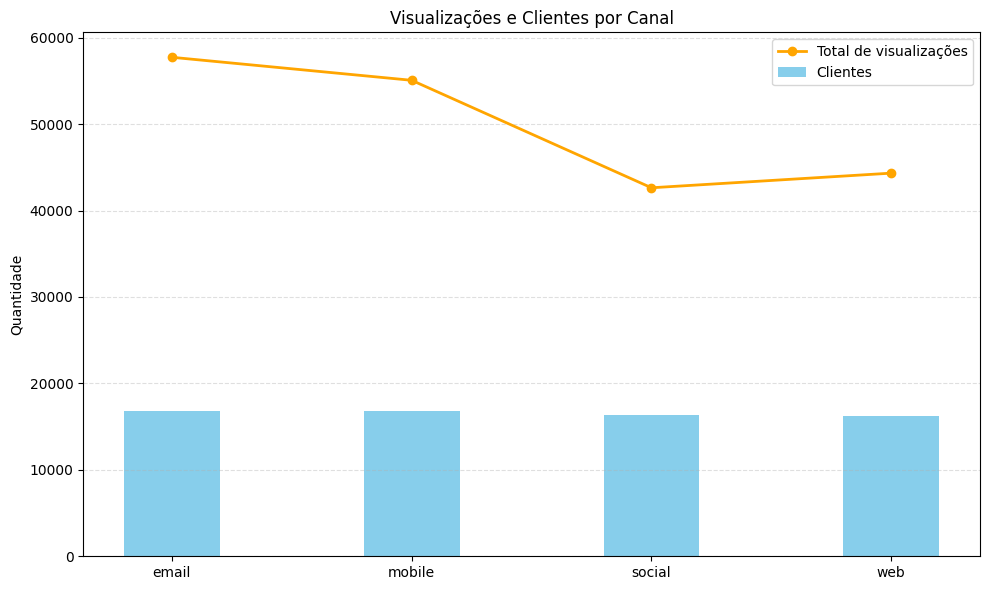

In [ ]:
# Dados
canais = df_agrupado['canal']
contas = df_agrupado['contas_unicas']
views = df_agrupado['total_views']
x = np.arange(len(canais))

plt.figure(figsize=(10, 6))

# Barras para contas únicas
plt.bar(x, contas, width=0.4, label='Clientes', color='skyblue')

# Linha para total de visualizações
plt.plot(x, views, marker='o', color='orange', linewidth=2, label='Total de visualizações')

# Eixos e rótulos
plt.xticks(x, canais)
plt.ylabel('Quantidade')
plt.title('Visualizações e Clientes por Canal')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Canal Preferido dos Clientes

In [ ]:
df_canal_preferido['canal_preferido'].value_counts()

,count
canal_preferido,
email,6431
web,4154
mobile,3492
social,2757


Text(0.5, 0, 'Canal Preferido')

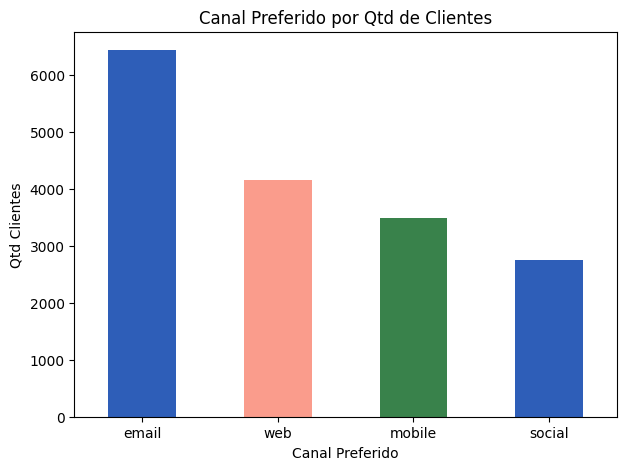

In [ ]:
df_canal_preferido['canal_preferido'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b'])
plt.xticks(rotation=0)
plt.title('Canal Preferido por Qtd de Clientes')
plt.ylabel('Qtd Clientes')
plt.xlabel('Canal Preferido')

## Quantidade de Eventos

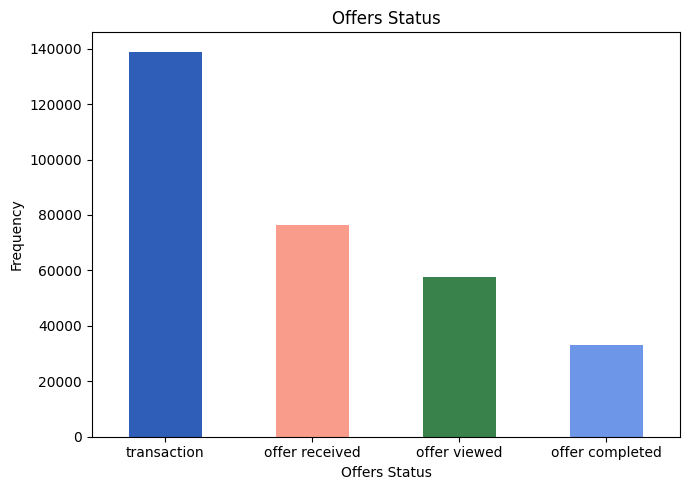

In [ ]:
df['event'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b', '#6d96e8'])
plt.title('Offers Status')
plt.xlabel('Offers Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.tight_layout()

## Distribuição do valor gasto

<Axes: >

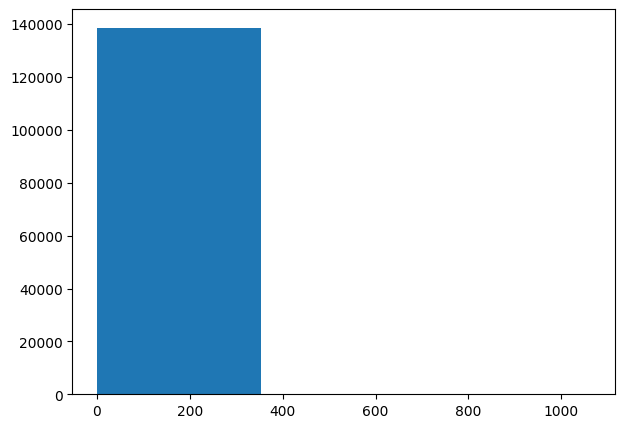

In [ ]:
df.amount.hist(figsize=(7, 5), grid  = False, bins = 3)

## Distribuição do valor de desconto

<Axes: >

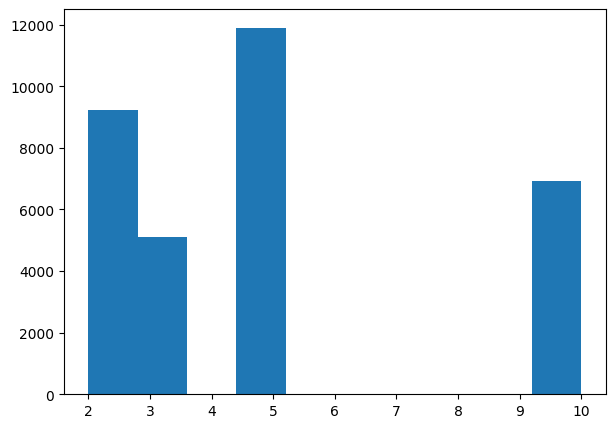

In [ ]:
df.reward.hist(figsize=(7, 5), grid  = False)

## Distribuição de transações por genero

<Axes: xlabel='gender'>

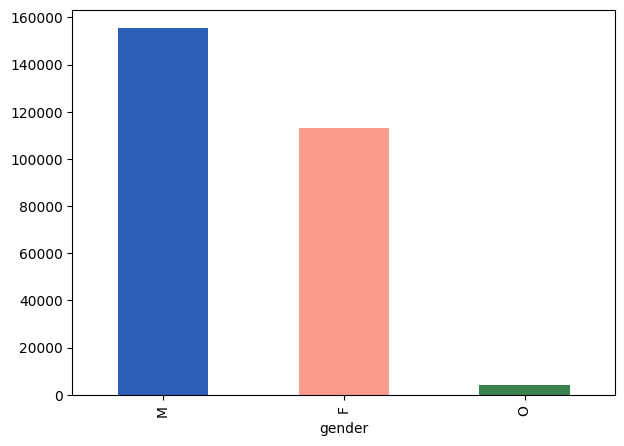

In [ ]:
#Perfil dos clientes por Genero
df['gender'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b'])

## Distribuição por Idade

<Axes: >

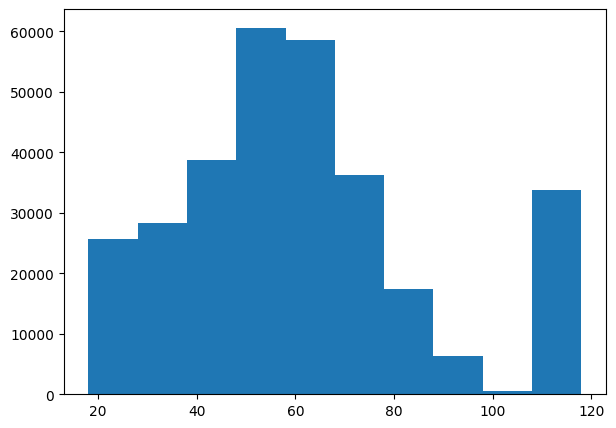

In [ ]:
#Perfil dos clientes por Idade
df['age'].hist(figsize=(7, 5), grid  = False)

## Tipos de Oferta

(array([0, 1, 2]),
 [Text(0, 0, 'bogo'), Text(1, 0, 'discount'), Text(2, 0, 'informational')])

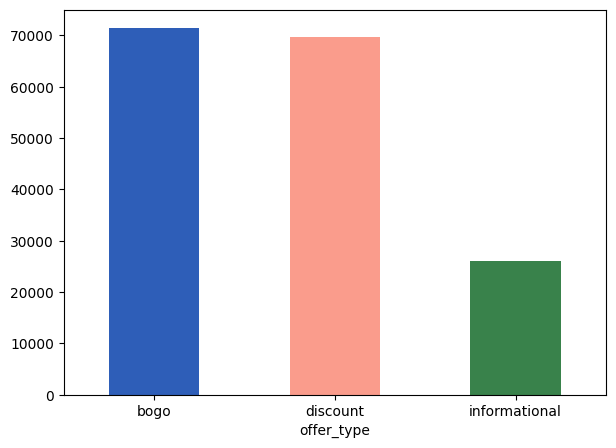

In [ ]:
#Tipos de Oferta
df['offer_type'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b'])
plt.xticks(rotation=0)

## Tempo Máximo desde o inicio de teste

<Axes: >

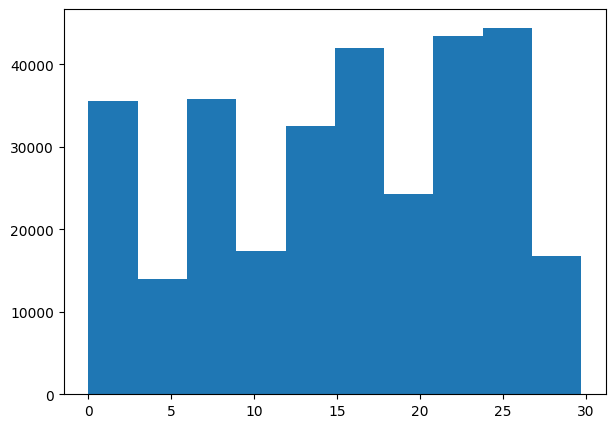

In [ ]:
df.time_since_test_start.hist(figsize=(7, 5), grid  = False)

## Qtd de Clientes que aderiram a oferta

In [ ]:
clientes_receberam_oferta = df_indicadores[df_indicadores['n_offer_received']==1]
clientes_visualizaram_oferta = df_indicadores[df_indicadores['n_offer_viewed']==1]
clientes_oferta = df_indicadores[df_indicadores['n_offer_completed']==1]

transacoes_receberam_oferta = df_indicadores[df_indicadores['n_offer_received']==1]
transacoes_visualizaram_oferta = df_indicadores[df_indicadores['n_offer_viewed']==1]
transacoes_oferta = df_indicadores[df_indicadores['n_offer_completed']==1]


In [ ]:
print("Qtd de Clientes", len(df_indicadores['account_id'].unique()))
print("Qtd de Clientes que receberam oferta", len(clientes_receberam_oferta['account_id'].unique()))
print("Qtd de Clientes que visualizaram a oferta", len(clientes_visualizaram_oferta['account_id'].unique()))
print("Qtd de Clientes que aderiram a oferta", len(clientes_oferta['account_id'].unique()))

print("Qtd de Transações", df.shape[0])
print("Qtd de Transações que receberam oferta", df[df['event']=='offer received'].shape[0])
print("Qtd de Transações que visualizaram a oferta", df[df['event']=='offer viewed'].shape[0])
print("Qtd de Transações que aderiram a oferta", df[df['event']=='offer completed'].shape[0])

print("Percentual de Transações com ofertas Recebidas:", (df[df['event']=='offer received'].shape[0])/df.shape[0])
print("Percentual de Transações com ofertas vistas:", (df[df['event']=='offer viewed'].shape[0])/df.shape[0])
print("Percentual de Transações com ofertas aceitas:", (df[df['event']=='offer completed'].shape[0])/df.shape[0])

Qtd de Clientes 16994
Qtd de Clientes que receberam oferta 16659
Qtd de Clientes que visualizaram a oferta 16160
Qtd de Clientes que aderiram a oferta 12208
Qtd de Transações 306137
Qtd de Transações que receberam oferta 76277
Qtd de Transações que visualizaram a oferta 57725
Qtd de Transações que aderiram a oferta 33182
Percentual de Transações com ofertas Recebidas: 0.24915968994273804
Percentual de Transações com ofertas vistas: 0.1885593704779233
Percentual de Transações com ofertas aceitas: 0.10838938122474578


### Qual oferta teve mais adesão?

In [ ]:
df_indicadores.groupby('offer_id_pk', as_index=False)['n_offer_completed'].sum()

,offer_id_pk,n_offer_completed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,3340
1,2298d6c36e964ae4a3e7e9706d1fb8c2,5112
2,2906b810c7d4411798c6938adc9daaa5,3964
3,3f207df678b143eea3cee63160fa8bed,0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,3301
5,5a8bc65990b245e5a138643cd4eb9837,0
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,4303
7,ae264e3637204a6fb9bb56bc8210ddfd,3635
8,f19421c1d4aa40978ebb69ca19b0e20d,4262
9,fafdcd668e3743c1bb461111dcafc2a4,5265


### Qual oferta teve mais visualização?

In [ ]:
df_indicadores.groupby('offer_id_pk', as_index=False)['n_offer_viewed'].sum()

,offer_id_pk,n_offer_viewed
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2663
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7337
2,2906b810c7d4411798c6938adc9daaa5,4118
3,3f207df678b143eea3cee63160fa8bed,4144
4,4d5c57ea9a6940dd891ad53e9dbe8da0,7298
5,5a8bc65990b245e5a138643cd4eb9837,6687
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,4171
7,ae264e3637204a6fb9bb56bc8210ddfd,6716
8,f19421c1d4aa40978ebb69ca19b0e20d,7264
9,fafdcd668e3743c1bb461111dcafc2a4,7327


## Valor gasto em transações por cada cliente

In [ ]:
df_transacoes = transactions[transactions['event']=='transaction']
df_transacoes = df_transacoes[['account_id','amount']]
df_transacoes = df_transacoes.groupby('account_id', as_index=False).sum()

In [ ]:
df_transacoes.columns = ['account_id','valor_total_gasto_transacoes']

df = df.merge(df_transacoes, how='left', left_on='account_id', right_on='account_id')
print(df.shape)
df.head(1)

(306137, 27)


,account_id,profile_id,event,offer_id_pk,offer_id_info,time_since_test_start,amount,reward,age,registered_on,...,channel_1,channel_2,channel_3,target,Fx_Idade,registered_date,account_age,Fx_Tempo_Conta,Fx_Limite,valor_total_gasto_transacoes
0,78afa995795e4d85b5d9ceeca43f5fef,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,0.00,NaN,NaN,75,20170509,...,email,mobile,NaN,0,Entre 66 e 90,2017-05-09,8.14,Entre 9 e 10,Entre 80k e 100k,159.27


In [ ]:
df = df.reset_index()
df.to_csv('/content/drive/MyDrive/10_Trabalho/2_Cases_testes/202506_Ifood/ifood-case/data/processed/df_processed.csv', index=False)

# Data Preparation

In [ ]:
df.columns

Index(['index', 'account_id', 'profile_id', 'event', 'offer_id_pk',
       'offer_id_info', 'time_since_test_start', 'amount', 'reward', 'age',
       'registered_on', 'gender', 'credit_card_limit', 'min_value', 'duration',
       'offer_type', 'discount_value', 'channel_0', 'channel_1', 'channel_2',
       'channel_3', 'target', 'Fx_Idade', 'registered_date', 'account_age',
       'Fx_Tempo_Conta', 'Fx_Limite', 'valor_total_gasto_transacoes'],
      dtype='object')

In [ ]:
df.shape
df_final = df[df['event']!= 'transaction']
df_final.shape

(167184, 28)

In [ ]:
#Filtrando variaveis que descrevem o cliente
df_final = df_final[['account_id', 'offer_id_pk','age',
       'gender', 'credit_card_limit','valor_total_gasto_transacoes',
       'account_age', 'target']]

## Valores Ausentes

In [ ]:
# Verificando o time de dado de cada variavel, numero de amostras e valores ausentes
df_ausentes = pd.DataFrame({
    'n_faltantes': df_final.isna().sum(),
    'percentual': df_final.isna().mean() * 100
}).sort_values('percentual', ascending=False)

print(df_ausentes)

                              n_faltantes  percentual
gender                              18753       11.22
credit_card_limit                   18753       11.22
valor_total_gasto_transacoes         3373        2.02
account_id                              0        0.00
age                                     0        0.00
offer_id_pk                             0        0.00
account_age                             0        0.00
target                                  0        0.00


In [ ]:
# Preencher valores ausentes dos campos numericos com 0
col_ausentes = ['credit_card_limit','valor_total_gasto_transacoes']
df_final[col_ausentes] = df_final[col_ausentes].fillna(0)

In [ ]:
df_final['gender'].value_counts()

,count
gender,
M,82689
F,63558
O,2184


In [ ]:
# gender, 'canal_preferido',
df_final['gender'] = df_final['gender'].fillna('O')

In [ ]:
# Verificando o time de dado de cada variavel, numero de amostras e valores ausentes
df_ausentes = pd.DataFrame({
    'n_faltantes': df_final.isna().sum(),
    'percentual': df_final.isna().mean() * 100
}).sort_values('percentual', ascending=False)

print(df_ausentes)

                              n_faltantes  percentual
account_id                              0        0.00
offer_id_pk                             0        0.00
age                                     0        0.00
gender                                  0        0.00
credit_card_limit                       0        0.00
valor_total_gasto_transacoes            0        0.00
account_age                             0        0.00
target                                  0        0.00


In [ ]:
df_final = df_final.drop_duplicates()

In [ ]:
#Informações gerais da base de dados
print('Quantidade de exemplos (linhas) :',df_final.shape[0])
print('Quantidade de caracteristicas (colunas) :',df_final.shape[1])
print('Quantidade de linhas duplicadas:',df_final[df_final.duplicated()].shape[0])

Quantidade de exemplos (linhas) : 92284
Quantidade de caracteristicas (colunas) : 8
Quantidade de linhas duplicadas: 0


In [ ]:
df_final.head(1)

,account_id,offer_id_pk,age,gender,credit_card_limit,valor_total_gasto_transacoes,account_age,target
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,F,100000.00,159.27,8.14,0


## Valores Numericos

## Padronização Valores **Numéricos**

In [ ]:
df_final = df_final.set_index(['account_id', 'offer_id_pk'])

In [ ]:
# Separando variaveis numericas
numericas = [ 'age', 'credit_card_limit','account_age','valor_total_gasto_transacoes']
df_final[numericas] = df_final[numericas].replace([np.inf, -np.inf], np.nan)
# Transformando variaveis numericas e deixando todas na mesma escala
scaler = MinMaxScaler()
df_final[numericas] = scaler.fit_transform(df_final[numericas])

In [ ]:
df[numericas].dtypes

,0
age,int64
credit_card_limit,float64
account_age,float64
valor_total_gasto_transacoes,float64


## Padronização Valores **Categoricas**

In [ ]:
# Separando colunas que são textuais
#Variaveis categoricas que precisam ser tratadas
categoricas = ['gender']
# Colunas para formato de texto
df_final[categoricas] = df_final[categoricas].astype(str)
# Transformando variaveis categoricas
df_final = pd.get_dummies(df_final, columns=categoricas)

In [ ]:
df_final.columns

Index(['age', 'credit_card_limit', 'valor_total_gasto_transacoes',
       'account_age', 'target', 'gender_F', 'gender_M', 'gender_O'],
      dtype='object')

## Remover variavel correlacioanada com target

<Axes: >

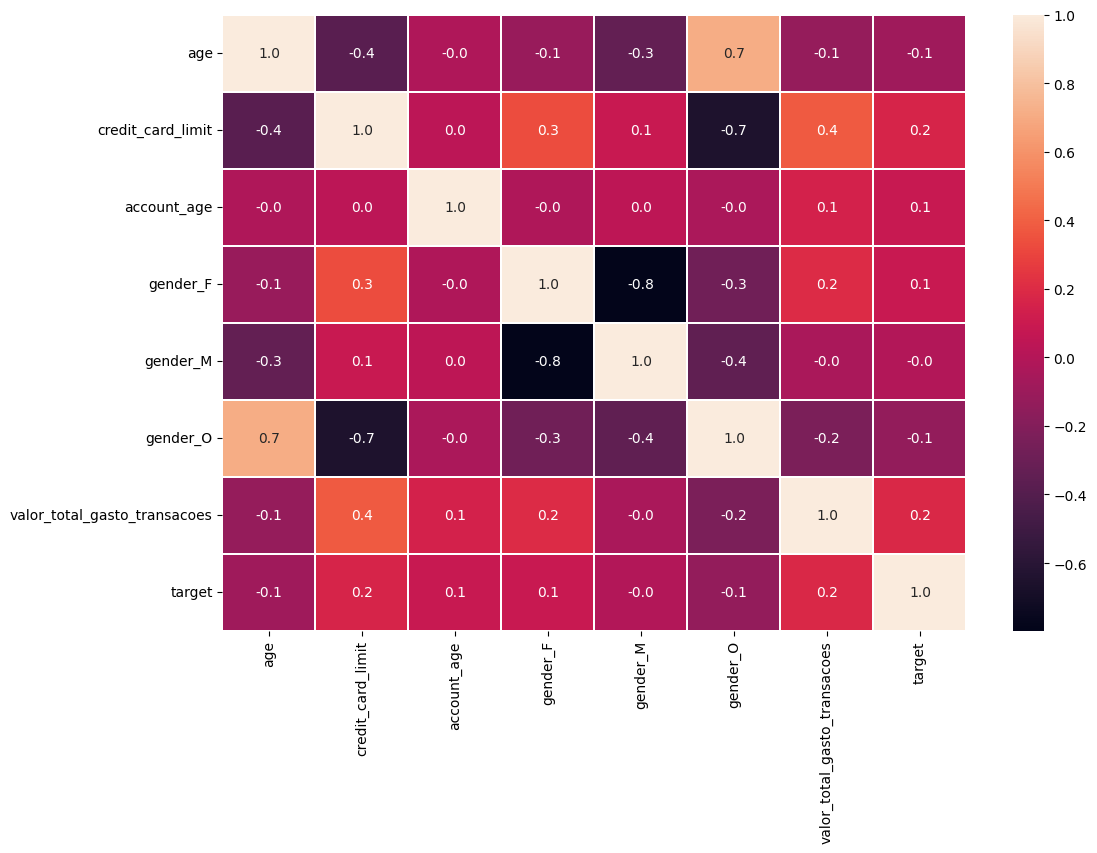

In [ ]:
df_heat = df_final[['age', 'credit_card_limit', 'account_age',  'gender_F',
       'gender_M', 'gender_O' ,'valor_total_gasto_transacoes','target']]

plt.figure(figsize=(12, 8))
sns.heatmap(df_heat.corr(), annot = True, fmt = '.1f', linewidths = 1.15)

# Export Dataset

In [ ]:
df_final = df_final.reset_index()
df_final.to_csv('/content/drive/MyDrive/10_Trabalho/2_Cases_testes/202506_Ifood/ifood-case/data/processed/df_processed_complete.csv', index=False)